# Árbol De Regresión

Los árboles de regresión son el subtipo de árboles de predicción que se aplica cuando la variable respuesta es continua. En términos generales, en el entrenamiento de un árbol de regresión, las observaciones se van distribuyendo por bifurcaciones (nodos) generando la estructura del árbol hasta alcanzar un nodo terminal. Cuando se quiere predecir una nueva observación, se recorre el árbol acorde al valor de sus predictores hasta alcanzar uno de los nodos terminales. La predicción del árbol es la media de la variable respuesta de las observaciones de entrenamiento que están en ese mismo nodo terminal.

# Datos

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston

In [19]:
datos = pd.read_csv("Boston.csv", sep=",")
datos.head() 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


La clase DecisionTreeRegressor del módulo sklearn.tree permite entrenar árboles de decisión para problemas de regresión. A continuación, se ajusta un árbol de regresión empleando como variable respuesta MEDV y como predictores todas las otras variables disponibles.  
  
DecisionTreeRegressor tiene por defecto muchos hiperparámetros, de entre todos ellos, los más importantes son aquellos que detienen el crecimiento del árbol (condiciones de stop):  

* max_depth: profundidad máxima que puede alcanzar el árbol.  
* min_samples_split: número mínimo de observaciones que debe de tener un nodo para que pueda dividirse. Si es un valor decimal se interpreta como fracción del total de observaciones de entrenamiento ceil(min_samples_split * n_samples).  
* min_samples_leaf: número mínimo de observaciones que debe de tener cada uno de los nodos hijos para que se produzca la división. Si es un valor decimal se interpreta como fracción del total de observaciones de entrenamiento ceil(min_samples_split * n_samples).  
* max_leaf_nodes: número máximo de nodos terminales.  
* random_state: semilla para que los resultados sean reproducibles. Tiene que ser un valor entero.  
  
  
  
Como en todo estudio de regresión, no solo es importante ajustar el modelo, sino también cuantificar su capacidad para predecir nuevas observaciones. Para poder hacer la posterior evaluación, se dividen los datos en dos grupos, uno de entrenamiento y otro de test.  
  
  


# División De los Datos En Train Y Test

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
                                        datos.drop(columns = "MEDV"), # Predictores
                                        datos['MEDV'], # Variable Respuesta
                                        random_state = 123
                                    )

# Creación del modelo

In [22]:
from sklearn.tree import DecisionTreeRegressor

In [23]:
modelo = DecisionTreeRegressor(
            max_depth         = 3, # Profundidad máxima
            random_state      = 123
          )

# Entrenamiento Del Modelo

In [24]:
# Ajustamos nuestro modelo con los datos de entrenamiento.
modelo.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=123)

# Representación Del Modelo

Una vez entrenado el árbol, se puede representar mediante la combinación de las funciones plot_tree() y export_text(). La función plot_tree() dibuja la estructura del árbol y muestra el número de observaciones y valor medio de la variable respuesta en cada nodo. La función export_text() representa esta misma información en formato texto

In [25]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

Profundidad del árbol: 3
Número de nodos terminales: 8


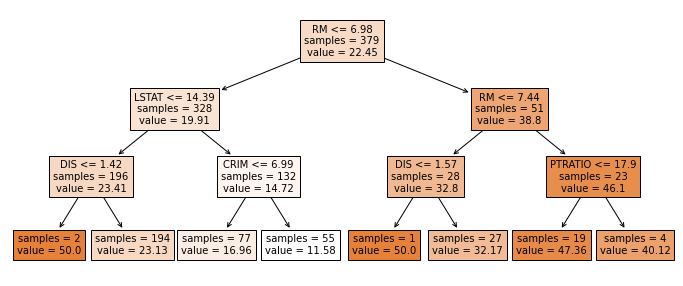

In [26]:
# Estructura del árbol creado
# ------------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(12, 5))

print(f"Profundidad del árbol: {modelo.get_depth()}")
print(f"Número de nodos terminales: {modelo.get_n_leaves()}")

# filled = Cuando se establece en True, pinta los nodos para indicar la clase
# mayoritaria para la clasificación, el extremo de los valores para la regresión
# o la pureza del nodo para la salida múltiple.

# fontsize = Tamaño de la fuente del texto. Si es Ninguno, se determina
# automáticamente para ajustarse a la figura.

# precision = Número de dígitos de precisión por coma flotante en los
# valores de impureza, umbral y atributos de valor de cada nodo.

plot = plot_tree(
            decision_tree = modelo, # modelo
            feature_names = datos.drop(columns = "MEDV").columns, #predictors
            class_names   = 'MEDV', #respuesta
            filled        = True, 
            impurity      = False,#Cuando se establece en True, muestra la impureza en cada nodo.
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )

In [27]:
# Texto del modelo
from sklearn.tree import export_text
texto_modelo = export_text(
                    decision_tree = modelo,
                    feature_names = list(datos.drop(columns = "MEDV").columns)
               )
print(texto_modelo)

|--- RM <= 6.98
|   |--- LSTAT <= 14.39
|   |   |--- DIS <= 1.42
|   |   |   |--- value: [50.00]
|   |   |--- DIS >  1.42
|   |   |   |--- value: [23.13]
|   |--- LSTAT >  14.39
|   |   |--- CRIM <= 6.99
|   |   |   |--- value: [16.96]
|   |   |--- CRIM >  6.99
|   |   |   |--- value: [11.58]
|--- RM >  6.98
|   |--- RM <= 7.44
|   |   |--- DIS <= 1.57
|   |   |   |--- value: [50.00]
|   |   |--- DIS >  1.57
|   |   |   |--- value: [32.17]
|   |--- RM >  7.44
|   |   |--- PTRATIO <= 17.90
|   |   |   |--- value: [47.36]
|   |   |--- PTRATIO >  17.90
|   |   |   |--- value: [40.12]



Siguiendo la rama más a la izquierda del árbol, puede verse que el modelo predice un precio promedio de 50000 dólares para viviendas que están en una zona con un RM <= 6.98, un LSTAT <= 14.39 y un DIS <= 1.42.

# Importancia De Predictores

La importancia de cada predictor en modelo se calcula como la reducción total (normalizada) en el criterio de división, en este caso el mse, que consigue el predictor en las divisiones en las que participa. Si un predictor no ha sido seleccionado en ninguna divisón, no se ha incluido en el modelo y por lo tanto su importancia es 0.


In [28]:
importancia_predictores = pd.DataFrame(
                            {'predictor': datos.drop(columns = "MEDV").columns,
                             'importancia': modelo.feature_importances_}
                            )
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores.sort_values('importancia', ascending=False)

Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
5,RM,0.671680
12,LSTAT,0.222326
7,DIS,0.064816
0,CRIM,0.034714
10,PTRATIO,0.006465
1,ZN,0.000000
2,INDUS,0.000000
3,CHAS,0.000000
4,NOX,0.000000
6,AGE,0.000000


El predictor RM, el número medio de habitaciones en las viviendas de la zona, ha resultado ser el predictor más importante en el modelo, seguido de LSTAT, que mide el porcentaje de personas en estado de pobreza.

# Podado Del Árbol (Pruning)

Con la finalidad de reducir la varianza del modelo y así mejorar la capacidad predictiva, se somete al árbol a un proceso de pruning. Tal como se describió con anterioridad, el proceso de pruning intenta encontrar el árbol más sencillo (menor tamaño) que consigue los mejores resultados de predicción.  
  
Para aplicar el proceso de pruning es necesario indicar el argumento ccp_alpha que determina el grado de penalización por complejidad. Cuanto mayor es este valor, más agresivo el podado y menor el tamaño del árbol resultante. Dado que no hay forma de conocer de antemano el valor óptimo de ccp_alpha, se recurre a validación cruzada para identificarlo.  
  
Aunque existen otras formas de indentificar árboles "optimos", por ejemplo identificando el valor de max_depth y min_samples_split mediante validación cruzada, el pruning puede generar mejores resultados ya que permite que una división poco útil se mantenga si las siguientes divisiones que parten de ella sí lo son.  


In [29]:
from sklearn.model_selection import GridSearchCV

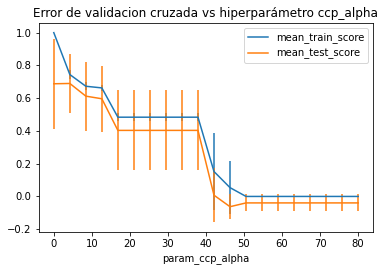

In [30]:
# Pruning (const complexity pruning) por validación cruzada
# ------------------------------------------------------------------------------
# Valores de ccp_alpha evaluados
param_grid = {'ccp_alpha':np.linspace(0, 80, 20)}

# Búsqueda por validación cruzada
grid = GridSearchCV(
        # El árbol se crece al máximo posible para luego aplicar el pruning
        estimator = DecisionTreeRegressor(
                            max_depth         = None, # se deja crecer el arbol 
                            min_samples_split = 2,#núm mín de obs de un nodo para poder dividirse.
                            min_samples_leaf  = 1,#núm mín de obs para nodos hijos para que se produzca la div
                            random_state      = 123
                       ),
        param_grid = param_grid,
        cv         = 10, #Determina la estrategia de división de validación cruzada
        refit      = True,#Reajuste un estimador utilizando los mejores parámetros encontrados en todo el conjunto de datos.
        return_train_score = True#Si False, el cv_results_atributo no incluirá puntuaciones de entrenamiento. 
      )
# Ajustamos con los datos de entrenamiento
grid.fit(X_train, y_train) 
# Graficamos
fig, ax = plt.subplots(figsize=(6, 3.84))
scores = pd.DataFrame(grid.cv_results_) # Dataframe de los resultados de cv
scores.plot(x='param_ccp_alpha', y='mean_train_score', yerr='std_train_score', ax=ax)
scores.plot(x='param_ccp_alpha', y='mean_test_score', yerr='std_test_score', ax=ax)
ax.set_title("Error de validacion cruzada vs hiperparámetro ccp_alpha");

In [31]:
# Mejor valor ccp_alpha encontrado
# ------------------------------------------------------------------------------
grid.best_params_

{'ccp_alpha': 4.2105263157894735}

Una vez identificado el valor óptimo de ccp_alpha, se reentrena el árbol indicando este valor en sus argumentos. Si en el **GridSearchCV()** se indica **refit=True**, este reentrenamiento se hace automáticamente y el modelo resultante se encuentra almacenado en **.best_estimator_**.

Profundidad del árbol: 2
Número de nodos terminales: 4


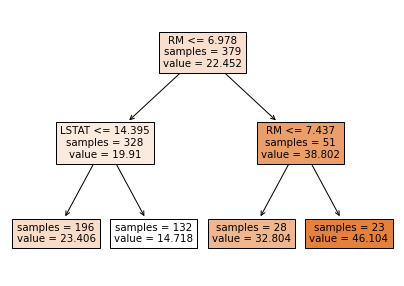

In [32]:
# Estructura del árbol final
# ------------------------------------------------------------------------------
# Como pusimos refit=True no es necesario volver a ajustar
modelo_final = grid.best_estimator_ 
print(f"Profundidad del árbol: {modelo_final.get_depth()}")
print(f"Número de nodos terminales: {modelo_final.get_n_leaves()}")
# Dibujamos nuevamente
fig, ax = plt.subplots(figsize=(7, 5))
plot = plot_tree(
            decision_tree = modelo_final,
            feature_names = datos.drop(columns = "MEDV").columns,
            class_names   = 'MEDV',
            filled        = True,
            impurity      = False,
            ax            = ax
       )

El proceso de pruning a identificado como mejor árbol uno mucho más pequeño que el modelo inicialmente entrenado.

# Predicción Y Evaluación Del Modelo


Por último, se evalúa la capacidad predictiva del primer árbol y del árbol final empleando el conjunto de test.



In [33]:
from sklearn.metrics import mean_squared_error

In [34]:
# Error de test del modelo inicial
#-------------------------------------------------------------------------------
# Ocupamos los datos de entrenamiento
predicciones = modelo.predict(X = X_test)

rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print(f"El error (rmse) de test es: {rmse}")

El error (rmse) de test es: 6.358813326315407


In [35]:
# Error de test del modelo final (tras aplicar pruning)
#-------------------------------------------------------------------------------
predicciones = modelo_final.predict(X = X_test)

rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print(f"El error (rmse) de test es: {rmse}")

El error (rmse) de test es: 5.91713823276661


El proceso de pruning consigue reducir el error rmse del modelo de 6.36 a 5.92. Las predicciones del modelo final se alejan en promedio 5.92 unidades (5920 dólares) del valor real.